# Degree Distribution Fitting

In this notebook, we attempt to fit a powerlaw function to the degree distribution of our graph.

We first estimate parameters using MLE and then calculate a goodness of fit using the KS test.

We try different methods for the parameter estimation.

In [1]:
import src.file_management as file_management
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import src.plot_utils as plot_utils
import statistics
import scipy.stats as stats
import powerlaw
from scipy.stats import lognorm
from scipy.stats import powerlaw as scpl
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import seaborn as sns


## Loading data

In [2]:
data = {}
time_created = {}

#property_name= "degree_distribution_in"
#property_name= "degree_distribution_out"
property_name = "url_degree_distribution"
data[property_name], time_created[property_name] = file_management.load_statistics(property_name) 

## Power law fitting using MLE

Fitting power law parameters for xmin = 0, xmax = 113
Resulting paramters: factor = 10000001.118164062 exponent = 5.629438671869959
Fitting power law parameters for xmin = 1, xmax = 113
Resulting paramters: factor = 9999999.98413086 exponent = 3.9561988281260545
Fitting power law parameters for xmin = 2, xmax = 113
Resulting paramters: factor = 10000001.000366211 exponent = 3.262007031250246
Fitting power law parameters for xmin = 3, xmax = 113
Resulting paramters: factor = 10000000.025299726 exponent = 2.9892062182162054
Fitting power law parameters for xmin = 4, xmax = 113
Resulting paramters: factor = 9999999.717495723 exponent = 1.5547947168051657
Fitting power law parameters for xmin = 5, xmax = 113
Resulting paramters: factor = 9999999.523613732 exponent = 1.484008930278806
Fitting power law parameters for xmin = 6, xmax = 113
Resulting paramters: factor = 9999999.954317514 exponent = 1.3886361647974828
Fitting power law parameters for xmin = 7, xmax = 113
Resulting paramters: fa

Fitting power law parameters for xmin = 72, xmax = 113
Resulting paramters: factor = 10000000.026957028 exponent = 1.0
Fitting power law parameters for xmin = 73, xmax = 113
Resulting paramters: factor = 10000000.180809222 exponent = 1.0
Fitting power law parameters for xmin = 74, xmax = 113
Resulting paramters: factor = 10000000.328385293 exponent = 1.0
Fitting power law parameters for xmin = 75, xmax = 113
Resulting paramters: factor = 10000000.588401752 exponent = 1.0
Fitting power law parameters for xmin = 76, xmax = 113
Resulting paramters: factor = 9999999.49237125 exponent = 1.0
Fitting power law parameters for xmin = 77, xmax = 113
Resulting paramters: factor = 9999999.698790923 exponent = 1.0
Fitting power law parameters for xmin = 78, xmax = 113
Resulting paramters: factor = 9999999.627549382 exponent = 1.0
Fitting power law parameters for xmin = 79, xmax = 113
Resulting paramters: factor = 9999999.377801381 exponent = 1.0
Fitting power law parameters for xmin = 80, xmax = 11

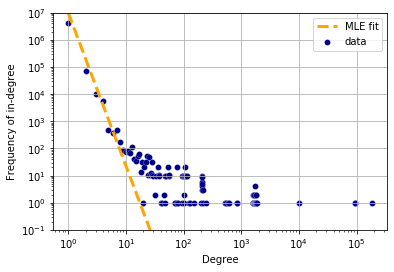

Plot saved as plots/plot__url_degree_distribution__mle_fit__1612771833.pdf.


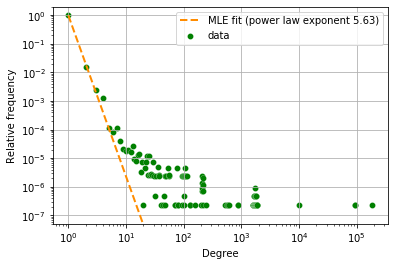

powerlaw exponents for different xmins:
{0: 5.629438671869959, 1: 3.9561988281260545, 2: 3.262007031250246, 3: 2.9892062182162054, 4: 1.5547947168051657, 5: 1.484008930278806, 6: 1.3886361647974828, 7: 1.070034134716913, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 0.9999999999999997, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 0.9999999999999999, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 0.9999999999999999, 27: 0.9999999999999997, 28: 1.0, 29: 1.0, 30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 0.9999999999999997, 35: 1.0, 36: 1.0, 37: 1.0, 38: 1.0, 39: 0.9999999999999998, 40: 1.0, 41: 0.9999999999999999, 42: 0.9999999999999999, 43: 1.0, 44: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 0.9999999999999996, 49: 1.0, 50: 1.0, 51: 1.0, 52: 1.0, 53: 1.0, 54: 1.0, 55: 1.0, 56: 1.0, 57: 0.9999999999999993, 58: 1.0, 59: 0.9999999999999997, 60: 1.0, 61: 1.0, 62: 1.0, 63: 1.0, 64: 1.0, 65: 1.0, 66: 1.0, 67: 1.0, 68: 0.9999999999999998, 69: 0.9999999999999999, 70: 1.0, 71: 1.0, 72: 1.0, 7

In [18]:
def loglikelihood(b):  

    # Power law function:
    powerlaw_fit_y = b[1] * degrees**(-b[0])

    # calculate the pdf of the current fit 
    # (the discrete probability disribution function)
    probabilities_fit = powerlaw_fit_y/powerlaw_fit_y.sum()

    # Now calculate the value of the log likelihood function,
    #  i.e. the probability to observe our data given that
    # it comes from the theoretical powerlaw distribution
    # with the current parameters b[1] and b[0], 
    # so with the pdf we just calculated in vector "probabilities_fit".
    # For this we take each node and multiple the 
    # observed degree d with the fit's pdf value of d,
    # and multiply all in this way obtained individual 
    # probabilities of all nodes.
    # (we don't actually have to take every node separately 
    # as we already now the frequency of each degree)
    # The log of the product of probabilities is equal to 
    # the sum of the log of the individual probabilities:
    Lvector = np.log(probabilities_fit) * freq_of_degrees
    L = Lvector.sum() 


    # We want to maximize the LogLikelihood, 
    # this is the same as minimizing (-1)*LogLikelihood:
    return(-L)


# Define constraint for power law function: (exponent has to be larger than 1)
def constraint_powerlaw(x):
    return x[0]-1 #this has to be larger than 0



def mle_fit_powerlaw(xmin, xmax):
    print("Fitting power law parameters for xmin = {}, xmax = {}".format(xmin, xmax))
    constraint_exponent = {'type': 'ineq', 'fun': constraint_powerlaw}
    s_best = minimize(loglikelihood, [4.5,10**7], constraints=constraint_exponent, method = 'COBYLA', options={'maxiter':10**5,'disp':True})
    #print(s_best)
    #freq_of_degrees_fit = s_best.x[1]*degrees**-s_best.x[0] # function values fit (absolute)
    pl_factor = s_best.x[1]
    pl_exponent = s_best.x[0]
    
    print("Resulting paramters: factor = {} exponent = {}".format(pl_factor, pl_exponent))
    return pl_factor, pl_exponent



# Run Fit for different xmin and xmax:
# (That means that we use only the data points 
# with degree from index xmin to xmax for the fit)

if property_name == "url_degree_distribution":
    xmin_range = range(0, len(data[property_name]['count(nodes)'])-2) # for url
else:
    xmin_range = range(1, len(data[property_name]['count(nodes)'])-2) #,100) # for in-degree and total degree
    
xmax = len(data[property_name]['count(nodes)'])-1


pl_factor = {}
pl_exponent = {}
freq_of_degrees_fit_dict = {} # contains only frequencies of occurring deegrees
freq_of_degrees_fit_dict_all = {} # contains freuqencies for all possible degrees for respective xmin and xmax
possible_degrees = {}

for xmin in xmin_range:
    
    # cut data according to xmin and xmax:
    if property_name == "url_degree_distribution":
        degrees = np.array(list(data[property_name]['degree'].values()))[xmin:xmax+1]    # for no_url_node_relations
    elif property_name == "degree_distribution_in":
        degrees = np.array(list(data[property_name]['in_degree'].values()))[xmin:xmax+1]    # for degree_distribution_in
    else:
        degrees = np.array(list(data[property_name]['out_degree'].values()))[xmin:xmax+1]    # for degree_distribution_out
        
    freq_of_degrees = np.array(list(data[property_name]['count(nodes)'].values()))[xmin:xmax+1]
    
    # estimate parameters:    
    pl_factor[xmin], pl_exponent[xmin] = mle_fit_powerlaw(xmin, xmax)
    
    # compute absolute degree frequencies of fit 
    # by inserting estimated parameters into powerlaw formula:
    freq_of_degrees_fit_dict[xmin] = pl_factor[xmin]*degrees**-pl_exponent[xmin] # only occurring degrees
    possible_degrees[xmin] = np.arange(degrees[0], degrees[-1]+1)
    freq_of_degrees_fit_dict_all[xmin] = pl_factor[xmin]*possible_degrees[xmin]**-pl_exponent[xmin] # all degrees in range
    

# ----- PLOT -----

# First select one fit for plotting
# We select the fit on complete data:
if property_name == "url_degree_distribution":
    xmin_plot = 0 # for url degree
else:
    xmin_plot = 1 # for in-degree and total degree

freq_of_degrees_fit = freq_of_degrees_fit_dict[xmin_plot]
if property_name == "url_degree_distribution":
    degrees = np.array(list(data[property_name]['degree'].values()))[xmin_plot:xmax+1] # for no_url_node_relations
elif property_name == "degree_distribution_in":
    degrees = np.array(list(data[property_name]['in_degree'].values()))[xmin_plot:xmax+1] # for degree_distribution_in
else:
    degrees = np.array(list(data[property_name]['out_degree'].values()))[xmin_plot:xmax+1] # for degree_distribution_out
    
freq_of_degrees = np.array(list(data[property_name]['count(nodes)'].values()))[xmin_plot:xmax+1] # for in and total


f,ax = plt.subplots()

# Data points (empirical distribution):
ax.scatter(degrees, freq_of_degrees, label = "data", color='darkblue', edgecolors='w',linewidths=0.2)

if property_name == "url_degree_distribution":
    ax.set_xlabel('Degree')
elif property_name == "degree_distribution_in":
    ax.set_xlabel('In-degree')
else:
    ax.set_xlabel('Out-degree')



ax.set_ylabel('Frequency of in-degree')
ax.set_xscale("log")
ax.set_yscale("log")

ax.plot(degrees, freq_of_degrees_fit, '--', color="orange", lw=3, label = "MLE fit")
plt.ylim(0.1,10**7)
ax.legend()
plt.grid()
plt.show()


# plot relative data:
freq_of_degrees_rel = freq_of_degrees/sum(freq_of_degrees)
freq_of_degrees_fit_rel = freq_of_degrees_fit/sum(freq_of_degrees_fit)

f,ax = plt.subplots()
# relative Data points (empirical distribution):
if property_name == "url_degree_distribution":
    ax.scatter(degrees, freq_of_degrees_rel, label = "data", color='green', edgecolors='w',linewidths=0.2)
else:
    ax.scatter(degrees, freq_of_degrees_rel, label = "data", color='darkblue', edgecolors='w',linewidths=0.2)

#title= 'Power law fit of in-degree distribution'
title = ''
if property_name == "url_degree_distribution":
    xlabel = 'Degree'
elif property_name == "degree_distribution_in":
    xlabel = 'In-degree'
else:
    xlabel = 'Out-degree'
    
ylabel = 'Relative frequency'
logarithmic = True
if property_name == "url_degree_distribution":
    ax.plot(degrees, freq_of_degrees_fit_rel, '--', color="darkorange", lw=2, label = "MLE fit (power law exponent {})".format(round(pl_exponent[xmin_plot],2)))
else:
    ax.plot(degrees, freq_of_degrees_fit_rel, '--', color="orange", lw=2, label = "MLE fit (power law exponent {})".format(round(pl_exponent[xmin_plot],2)))

plot_utils.settings(title=title, xlabel=xlabel, ylabel=ylabel, logarithmic=logarithmic)
ax.set_xscale("log")
#ax.set_yscale("log")
plt.ylim(10**(-7)-5*10**(-8), 2)

ax.legend()
plt.grid()

if property_name == "url_degree_distribution":
    file_management.save_plot("url_degree_distribution__mle_fit")
#elif property_name == "degree_distribution_in":
#file_management.save_plot("degree_distribution_in__mle_fit")
    
plt.show()

print("powerlaw exponents for different xmins:")
print(pl_exponent)

## Calculation of ECDF of our data and CDF of power law fit
We now from our fitting results compute the empricial distribution function (ecdf) of the data and cumulative distribution function (cdf) of the powerlaw fit, obtained by MLE. We need these two functions to compute the test statistic of a KS test.

Calculating for xmin =  1
Calculating for xmin =  2
Calculating for xmin =  3
Calculating for xmin =  4
Calculating for xmin =  5
Calculating for xmin =  6
Calculating for xmin =  7
Calculating for xmin =  8
Calculating for xmin =  9
Calculating for xmin =  10
Calculating for xmin =  11
Calculating for xmin =  12
Calculating for xmin =  13
Calculating for xmin =  14
Calculating for xmin =  15
Calculating for xmin =  16
Calculating for xmin =  17
Calculating for xmin =  18
Calculating for xmin =  19
Calculating for xmin =  20
Calculating for xmin =  21
Calculating for xmin =  22
Calculating for xmin =  23
Calculating for xmin =  24
Calculating for xmin =  25
Calculating for xmin =  26
Calculating for xmin =  27
Calculating for xmin =  28
Calculating for xmin =  29
Calculating for xmin =  30
Calculating for xmin =  31
Calculating for xmin =  32
Calculating for xmin =  33
Calculating for xmin =  34
Calculating for xmin =  35
Calculating for xmin =  36
Calculating for xmin =  37
Calculatin

Calculating for xmin =  298
Calculating for xmin =  299
Calculating for xmin =  300
Calculating for xmin =  301
Calculating for xmin =  302
Calculating for xmin =  303
Calculating for xmin =  304
Calculating for xmin =  305
Calculating for xmin =  306
Calculating for xmin =  307
Calculating for xmin =  308
Calculating for xmin =  309
Calculating for xmin =  310
Calculating for xmin =  311
Calculating for xmin =  312
Calculating for xmin =  313
Calculating for xmin =  314
Calculating for xmin =  315
Calculating for xmin =  316
Calculating for xmin =  317
Calculating for xmin =  318
Calculating for xmin =  319
Calculating for xmin =  320
Calculating for xmin =  321
Calculating for xmin =  322
Calculating for xmin =  323
Calculating for xmin =  324
Calculating for xmin =  325
Calculating for xmin =  326
Calculating for xmin =  327
Calculating for xmin =  328
Calculating for xmin =  329
Calculating for xmin =  330
Calculating for xmin =  331
Calculating for xmin =  332
Calculating for xmin

Calculating for xmin =  591
Calculating for xmin =  592
Calculating for xmin =  593
Calculating for xmin =  594


/Users/ellyschmidt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


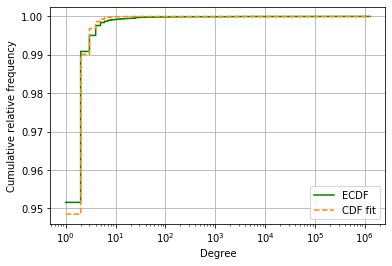

In [13]:


ecdf_data_dict = {}
cdf_fit_dict = {}
for xmin in xmin_range:
    print("Calculating for xmin = ", xmin)
    # for original data:
    if property_name == "url_degree_distribution":
        degrees = np.array(list(data[property_name]['degree'].values()))[xmin:xmax+1]
    elif property_name == "degree_distribution_in":
        degrees = np.array(list(data[property_name]['in_degree'].values()))[xmin:xmax+1]
    else:
        degrees = np.array(list(data[property_name]['out_degree'].values()))[xmin:xmax+1]
 
    freq_of_degrees = np.array(list(data[property_name]['count(nodes)'].values()))[xmin:xmax+1] # only occurring degrees
    
    # create the array of frequencies of ALL possible degrees in range 
    # by filling up the frequencies of not occurring degrees with zeros
    freq_of_degrees_all = []

    previous_degree = degrees[0]-1 # for url
    for index_d, d in enumerate(degrees):
        freq_of_degrees_all.append(freq_of_degrees[index_d]) #add frequency of degree d
        gap_width = d-previous_degree-1 # number of degrees between previous and current that do not occur
        if gap_width>0:
            gap = [0] * gap_width
            freq_of_degrees_all.extend(gap)
        previous_degree = d
        
    #pdf_data = freq_of_degrees/sum(freq_of_degrees)
    pdf_data = freq_of_degrees_all/sum(freq_of_degrees_all)
    ecdf_data_dict[xmin] = np.cumsum(pdf_data)


    # for MLE fits:
    #pdf_fit = freq_of_degrees_fit_dict[xmin]/sum(freq_of_degrees_fit_dict[xmin])
    pdf_fit = freq_of_degrees_fit_dict_all[xmin]/sum(freq_of_degrees_fit_dict_all[xmin])
    cdf_fit_dict[xmin] = np.cumsum(pdf_fit)


# only plot ecdf and cdf of one fit (for one xmin):
ecdf_data = ecdf_data_dict[xmin_plot]
cdf_fit = cdf_fit_dict[xmin_plot]
possible_degrees_plot = possible_degrees[xmin_plot]

#plt.step(degrees, ecdf_data, where='post', color='green', lw=1.5,label='ECDF')
if property_name == "url_degree_distribution":
    plt.step(possible_degrees_plot, ecdf_data, where='post', color='green', lw=1.5,label='ECDF')
else:
    plt.step(possible_degrees_plot, ecdf_data, where='post', color='darkblue', lw=1.5,label='ECDF')


#plt.step(degrees, cdf_fit, '--', where='post', color='darkorange', lw=1.5,  label='CDF fit')
plt.step(possible_degrees_plot, cdf_fit, '--', where='post', color='darkorange', lw=1.5,  label='CDF fit')

plt.xscale('log')
#plt.yscale('log')

if property_name == "url_degree_distribution":
    xlabel = 'Degree'
elif property_name == "degree_distribution_in"::
    xlabel = 'In-degree'
else:
    xlabel = 'Out-degree'
ylabel = 'Cumulative relative frequency'
title=""
#title = "ECDF of in-degrees vs CDF of power law fit"
plot_utils.settings(title=title, xlabel=xlabel, ylabel=ylabel, logarithmic=False)
plt.grid()
plt.legend()

#file_management.save_plot("degree_distribution_in__mle_fit_cdf")
#file_management.save_plot("url_degree_distribution__mle_fit_cdf")
plt.show()

In [14]:
print(possible_degrees[30])
print(len(possible_degrees[30]))
print(len(ecdf_data_dict[30]))
print(len(cdf_fit_dict[30]))

[     30      31      32 ... 1277893 1277894 1277895]
1277866
1277866
1277866


## Running the KS test

In [16]:
# Kolmogorov-Smirnov-test (to determine the goodness of fit)
# our 0-hypothesis is this:
# H_0 : our data (with ecdf "ecdf_data") is drawn from the theretical distribution with cdf "cdf_fit"
# We try a significance level alpha = 0.05 and alpha 0.01
# The critical value for these alpha and our sample size n (the number of nodes of which we consider the degree)
# is C1 = 1.36/np.sqrt(n) for alpha = 0.05 and C2 = 1.63/np.sqrt(n) for alpha = 0.01.
# This means that the probability is 0.05 to draw from the distribution of our theoretical cdf 
# a sample where the test statistic is greater than C1 (and 0.01 for greater than C2).
# We reject H_0 if D > C2.

ks_test_statistic = {}
ks_critical_value005 = {}
ks_critical_value001 = {}
test_failed_count = 0

for xmin in xmin_range:
    print("Running KS test for xmin = {} ...".format(xmin))
    if property_name == "url_degree_distribution":
        dmin = np.array(list(data[property_name]['degree'].values()))[xmin]
    elif property_name == "degree_distribution_in":
        dmin = np.array(list(data[property_name]['in_degree'].values()))[xmin]
    else:
        dmin = np.array(list(data[property_name]['out_degree'].values()))[xmin]
 
    
    print("(This xmin corresponds to in-degree {})".format(dmin))
    # calculate absolute differences of the cdf and the ecdf:
    array_absolute_differences_ecdf_cdf = np.abs(ecdf_data_dict[xmin]-cdf_fit_dict[xmin])

    # get the maximal absolute difference
    # (this is the test statistic for the KS test)
    ks_test_statistic[xmin] = max(array_absolute_differences_ecdf_cdf)
    print("Test statistic of KS test: D = ", ks_test_statistic[xmin])

    freq_of_degrees = np.array(list(data[property_name]['count(nodes)'].values()))[xmin:xmax+1]
    sample_size = sum(freq_of_degrees)


    ks_critical_value005[xmin] = 1.36/np.sqrt(sample_size) # alpha = 0.05
    ks_critical_value001[xmin] = 1.63/np.sqrt(sample_size) # alpha = 0.01

    print("Critical value for significance value alpha=0.05 and n={}: {}".format(sample_size, ks_critical_value005[xmin]))
    print("Critical value for significance value alpha=0.01 and n={}: {}".format(sample_size, ks_critical_value001[xmin]))
    print()

    if ks_test_statistic[xmin] < ks_critical_value001[xmin]:
        print("The test statistic for our data is smaller than the critical value for alpha=0.01. \nTherefore, we can not reject the 0-hypothesis.")
        print("Hence, our test suggests that it is plausible that our data could follow the fitted distibution :)")
    else: 
        test_failed_count += 1
        print("The test statistic for our data is greater than the critical value for alpha=0.01. \nTherefore, we should reject the 0-hypothesis.")
        print("Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(")
    print()
    print("-----")
    print()

print("Results: In {} of {} tests we rejected the 0-hypothesis.".format(test_failed_count, len(xmin_range)))

Running KS test for xmin = 1 ...
(This xmin corresponds to in-degree 1)
Test statistic of KS test: D =  0.003057766183028332
Critical value for significance value alpha=0.05 and n=7339842: 0.0005019905628821622
Critical value for significance value alpha=0.01 and n=7339842: 0.0006016504540425914

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 2 ...
(This xmin corresponds to in-degree 2)
Test statistic of KS test: D =  0.0678274601102935
Critical value for significance value alpha=0.05 and n=355407: 0.002281265957555934
Critical value for significance value alpha=0.01 and n=355407: 0.0027341643461883617

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that

Test statistic of KS test: D =  0.6117186648980912
Critical value for significance value alpha=0.05 and n=4067: 0.02132562765513984
Critical value for significance value alpha=0.01 and n=4067: 0.025559391969027893

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 18 ...
(This xmin corresponds to in-degree 18)
Test statistic of KS test: D =  0.6166604808541332
Critical value for significance value alpha=0.05 and n=3863: 0.021881473007749473
Critical value for significance value alpha=0.01 and n=3863: 0.02622558897252326

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

---

Test statistic of KS test: D =  0.45897035349611687
Critical value for significance value alpha=0.05 and n=1760: 0.03241772803435014
Critical value for significance value alpha=0.01 and n=1760: 0.03885360051175788

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 34 ...
(This xmin corresponds to in-degree 34)
Test statistic of KS test: D =  0.45756782856681666
Critical value for significance value alpha=0.05 and n=1721: 0.03278298335532887
Critical value for significance value alpha=0.01 and n=1721: 0.03929136975675445

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

---

Test statistic of KS test: D =  0.4518714139315666
Critical value for significance value alpha=0.05 and n=1440: 0.03583914681524163
Critical value for significance value alpha=0.01 and n=1440: 0.04295427155062048

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 50 ...
(This xmin corresponds to in-degree 50)
Test statistic of KS test: D =  0.45146688799163504
Critical value for significance value alpha=0.05 and n=1426: 0.036014645610601574
Critical value for significance value alpha=0.01 and n=1426: 0.04316461201858865

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

---

Test statistic of KS test: D =  0.4431033277387595
Critical value for significance value alpha=0.05 and n=1221: 0.038920738878185694
Critical value for significance value alpha=0.01 and n=1221: 0.04664765027311961

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 66 ...
(This xmin corresponds to in-degree 69)
Test statistic of KS test: D =  0.4437381193594606
Critical value for significance value alpha=0.05 and n=1219: 0.03895265420858193
Critical value for significance value alpha=0.01 and n=1219: 0.04668590173528569

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

----

Test statistic of KS test: D =  0.44660298210931426
Critical value for significance value alpha=0.05 and n=1131: 0.04043967027460358
Critical value for significance value alpha=0.01 and n=1131: 0.04846813422617929

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 82 ...
(This xmin corresponds to in-degree 91)
Test statistic of KS test: D =  0.4466369933936083
Critical value for significance value alpha=0.05 and n=1127: 0.040511371873945955
Critical value for significance value alpha=0.01 and n=1127: 0.04855407070186169

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

---

Test statistic of KS test: D =  0.42910716350838096
Critical value for significance value alpha=0.05 and n=915: 0.04496021313369547
Critical value for significance value alpha=0.01 and n=915: 0.05388613779994383

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 98 ...
(This xmin corresponds to in-degree 109)
Test statistic of KS test: D =  0.42894439580856325
Critical value for significance value alpha=0.05 and n=906: 0.04518297360458649
Critical value for significance value alpha=0.01 and n=906: 0.05415312277608528

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----


Test statistic of KS test: D =  0.43398132481079266
Critical value for significance value alpha=0.05 and n=815: 0.047638722199076
Critical value for significance value alpha=0.01 and n=815: 0.057096409694480786

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 114 ...
(This xmin corresponds to in-degree 139)
Test statistic of KS test: D =  0.4346995909370821
Critical value for significance value alpha=0.05 and n=814: 0.047667975331829156
Critical value for significance value alpha=0.01 and n=814: 0.0571314704344717

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----



Test statistic of KS test: D =  0.4499345629388881
Critical value for significance value alpha=0.05 and n=787: 0.0484787643943673
Critical value for significance value alpha=0.01 and n=787: 0.0581032249726608

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 130 ...
(This xmin corresponds to in-degree 191)
Test statistic of KS test: D =  0.45046783306732097
Critical value for significance value alpha=0.05 and n=786: 0.048509593500436675
Critical value for significance value alpha=0.01 and n=786: 0.05814017456302336

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----



Test statistic of KS test: D =  0.4430449057801654
Critical value for significance value alpha=0.05 and n=640: 0.05375872022286245
Critical value for significance value alpha=0.01 and n=640: 0.06443140732593072

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 146 ...
(This xmin corresponds to in-degree 220)
Test statistic of KS test: D =  0.443477683203041
Critical value for significance value alpha=0.05 and n=639: 0.053800768504788016
Critical value for significance value alpha=0.01 and n=639: 0.06448180342853269

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----



Test statistic of KS test: D =  0.46383394462077576
Critical value for significance value alpha=0.05 and n=619: 0.05466301523195358
Critical value for significance value alpha=0.01 and n=619: 0.06551523149123847

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 162 ...
(This xmin corresponds to in-degree 320)
Test statistic of KS test: D =  0.46432736845688366
Critical value for significance value alpha=0.05 and n=618: 0.05470722309622082
Critical value for significance value alpha=0.01 and n=618: 0.06556821591679407

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Test statistic of KS test: D =  0.47760344143268463
Critical value for significance value alpha=0.05 and n=602: 0.05542946192386713
Critical value for significance value alpha=0.01 and n=602: 0.06643384039404662

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 178 ...
(This xmin corresponds to in-degree 405)
Test statistic of KS test: D =  0.4779905686194642
Critical value for significance value alpha=0.05 and n=601: 0.05547555711846429
Critical value for significance value alpha=0.01 and n=601: 0.06648908684051234

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----


Test statistic of KS test: D =  0.49764356249912534
Critical value for significance value alpha=0.05 and n=584: 0.056277200424961024
Critical value for significance value alpha=0.01 and n=584: 0.06744987992109298

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 194 ...
(This xmin corresponds to in-degree 552)
Test statistic of KS test: D =  0.4977830023749458
Critical value for significance value alpha=0.05 and n=583: 0.056325444926255595
Critical value for significance value alpha=0.01 and n=583: 0.06750770237485045

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

----

Test statistic of KS test: D =  0.5184742980231892
Critical value for significance value alpha=0.05 and n=565: 0.05721563001998729
Critical value for significance value alpha=0.01 and n=565: 0.06857461539160241

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 210 ...
(This xmin corresponds to in-degree 751)
Test statistic of KS test: D =  0.5189796060393812
Critical value for significance value alpha=0.05 and n=564: 0.057266330632523295
Critical value for significance value alpha=0.01 and n=564: 0.0686353815669213

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----



Test statistic of KS test: D =  0.5280710184447042
Critical value for significance value alpha=0.05 and n=546: 0.05820262698148416
Critical value for significance value alpha=0.01 and n=546: 0.06975756027927879

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 226 ...
(This xmin corresponds to in-degree 872)
Test statistic of KS test: D =  0.5284999177975911
Critical value for significance value alpha=0.05 and n=545: 0.05825599941542423
Critical value for significance value alpha=0.01 and n=545: 0.06982152871113345

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----



Test statistic of KS test: D =  0.5539757760549128
Critical value for significance value alpha=0.05 and n=529: 0.0591304347826087
Critical value for significance value alpha=0.01 and n=529: 0.0708695652173913

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 242 ...
(This xmin corresponds to in-degree 1202)
Test statistic of KS test: D =  0.5539705515371002
Critical value for significance value alpha=0.05 and n=528: 0.05918640302493727
Critical value for significance value alpha=0.01 and n=528: 0.07093664480194686

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

R

Test statistic of KS test: D =  0.5736254086158005
Critical value for significance value alpha=0.05 and n=513: 0.06004546685361532
Critical value for significance value alpha=0.01 and n=513: 0.07196625806720071

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 258 ...
(This xmin corresponds to in-degree 1567)
Test statistic of KS test: D =  0.5765836228360657
Critical value for significance value alpha=0.05 and n=512: 0.06010407640085654
Critical value for significance value alpha=0.01 and n=512: 0.07203650333337952

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----


Test statistic of KS test: D =  0.575480429247499
Critical value for significance value alpha=0.05 and n=477: 0.062270122323405695
Critical value for significance value alpha=0.01 and n=477: 0.07463257307878769

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 274 ...
(This xmin corresponds to in-degree 1652)
Test statistic of KS test: D =  0.5749574172767005
Critical value for significance value alpha=0.05 and n=474: 0.06246686885574906
Critical value for significance value alpha=0.01 and n=474: 0.07486837958446393

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----


Test statistic of KS test: D =  0.5708113572856257
Critical value for significance value alpha=0.05 and n=438: 0.06498331362917954
Critical value for significance value alpha=0.01 and n=438: 0.07788441265850195

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 290 ...
(This xmin corresponds to in-degree 1718)
Test statistic of KS test: D =  0.5710554628706633
Critical value for significance value alpha=0.05 and n=437: 0.06505762275995182
Critical value for significance value alpha=0.01 and n=437: 0.07797347433729519

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----


Test statistic of KS test: D =  0.5647417982799514
Critical value for significance value alpha=0.05 and n=399: 0.06808515970775922
Critical value for significance value alpha=0.01 and n=399: 0.0816020664144467

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 306 ...
(This xmin corresponds to in-degree 1775)
Test statistic of KS test: D =  0.5645225561539065
Critical value for significance value alpha=0.05 and n=398: 0.06817064016792364
Critical value for significance value alpha=0.01 and n=398: 0.08170451726008493

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----



Test statistic of KS test: D =  0.5576310492856487
Critical value for significance value alpha=0.05 and n=363: 0.07138148782708101
Critical value for significance value alpha=0.01 and n=363: 0.08555281261628091

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 322 ...
(This xmin corresponds to in-degree 1848)
Test statistic of KS test: D =  0.5576902912509358
Critical value for significance value alpha=0.05 and n=362: 0.0714800130469586
Critical value for significance value alpha=0.01 and n=362: 0.08567089799010479

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----



Test statistic of KS test: D =  0.5708101368749245
Critical value for significance value alpha=0.05 and n=345: 0.07321993867991052
Critical value for significance value alpha=0.01 and n=345: 0.08775625003548097

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 338 ...
(This xmin corresponds to in-degree 2221)
Test statistic of KS test: D =  0.570985098276015
Critical value for significance value alpha=0.05 and n=344: 0.07332628577833812
Critical value for significance value alpha=0.01 and n=344: 0.0878837101608023

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

R

Test statistic of KS test: D =  0.5307829998847655
Critical value for significance value alpha=0.05 and n=255: 0.08516650358758034
Critical value for significance value alpha=0.01 and n=255: 0.10207455944687936

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 354 ...
(This xmin corresponds to in-degree 2307)
Test statistic of KS test: D =  0.5295901821162423
Critical value for significance value alpha=0.05 and n=253: 0.08550246743082268
Critical value for significance value alpha=0.01 and n=253: 0.10247722199429482

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----


Test statistic of KS test: D =  0.5263712524716091
Critical value for significance value alpha=0.05 and n=234: 0.08890598126264343
Critical value for significance value alpha=0.01 and n=234: 0.10655643342507998

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 370 ...
(This xmin corresponds to in-degree 2535)
Test statistic of KS test: D =  0.5264362523800735
Critical value for significance value alpha=0.05 and n=233: 0.0890965623629369
Critical value for significance value alpha=0.01 and n=233: 0.1067848504791082

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

R

Test statistic of KS test: D =  0.5362565107589298
Critical value for significance value alpha=0.05 and n=217: 0.09232281572908978
Critical value for significance value alpha=0.01 and n=217: 0.11065161002824729

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 386 ...
(This xmin corresponds to in-degree 3284)
Test statistic of KS test: D =  0.5432314491921162
Critical value for significance value alpha=0.05 and n=216: 0.09253627917180896
Critical value for significance value alpha=0.01 and n=216: 0.11090745224268278

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----


Test statistic of KS test: D =  0.5606771580342944
Critical value for significance value alpha=0.05 and n=200: 0.09616652224137047
Critical value for significance value alpha=0.01 and n=200: 0.11525840533340724

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 402 ...
(This xmin corresponds to in-degree 4244)
Test statistic of KS test: D =  0.5601440698962474
Critical value for significance value alpha=0.05 and n=199: 0.09640784388113369
Critical value for significance value alpha=0.01 and n=199: 0.11554763641635873

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----


Test statistic of KS test: D =  0.5644227204047342
Critical value for significance value alpha=0.05 and n=184: 0.10026053018533006
Critical value for significance value alpha=0.01 and n=184: 0.12016519426624116

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 418 ...
(This xmin corresponds to in-degree 4970)
Test statistic of KS test: D =  0.5642304863887571
Critical value for significance value alpha=0.05 and n=183: 0.10053409284982191
Critical value for significance value alpha=0.01 and n=183: 0.12049306716559537

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----


Test statistic of KS test: D =  0.5629445307140255
Critical value for significance value alpha=0.05 and n=168: 0.1049262779742225
Critical value for significance value alpha=0.01 and n=168: 0.1257572302191049

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 434 ...
(This xmin corresponds to in-degree 5659)
Test statistic of KS test: D =  0.5620421306246994
Critical value for significance value alpha=0.05 and n=167: 0.10523995962464262
Critical value for significance value alpha=0.01 and n=167: 0.1261331869030643

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Ru

Test statistic of KS test: D =  0.5570523514235018
Critical value for significance value alpha=0.05 and n=152: 0.11031056636891855
Critical value for significance value alpha=0.01 and n=152: 0.13221045822157146

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 450 ...
(This xmin corresponds to in-degree 6419)
Test statistic of KS test: D =  0.5557447023547545
Critical value for significance value alpha=0.05 and n=151: 0.11067523039287769
Critical value for significance value alpha=0.01 and n=151: 0.132647518779699

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

R

Test statistic of KS test: D =  0.5425089097680439
Critical value for significance value alpha=0.05 and n=136: 0.11661903789690602
Critical value for significance value alpha=0.01 and n=136: 0.13977134689114468

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 466 ...
(This xmin corresponds to in-degree 7172)
Test statistic of KS test: D =  0.5419136174944043
Critical value for significance value alpha=0.05 and n=135: 0.11705016335204639
Critical value for significance value alpha=0.01 and n=135: 0.14028806342929087

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----


Test statistic of KS test: D =  0.521850110840983
Critical value for significance value alpha=0.05 and n=120: 0.12415044636783766
Critical value for significance value alpha=0.01 and n=120: 0.14879796145557012

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 482 ...
(This xmin corresponds to in-degree 8115)
Test statistic of KS test: D =  0.5225427599325544
Critical value for significance value alpha=0.05 and n=119: 0.12467099559583675
Critical value for significance value alpha=0.01 and n=119: 0.14942185501559843

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----



Test statistic of KS test: D =  0.487880994763124
Critical value for significance value alpha=0.05 and n=104: 0.13335897189396517
Critical value for significance value alpha=0.01 and n=104: 0.15983465013762

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 498 ...
(This xmin corresponds to in-degree 8814)
Test statistic of KS test: D =  0.4845850324887595
Critical value for significance value alpha=0.05 and n=103: 0.1340047818303439
Critical value for significance value alpha=0.01 and n=103: 0.16060867234077977

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Runn

Test statistic of KS test: D =  0.4485564194141721
Critical value for significance value alpha=0.05 and n=88: 0.1449764871218151
Critical value for significance value alpha=0.01 and n=88: 0.17375858382982248

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 514 ...
(This xmin corresponds to in-degree 9975)
Test statistic of KS test: D =  0.4448990836117143
Critical value for significance value alpha=0.05 and n=87: 0.1458073047379401
Critical value for significance value alpha=0.01 and n=87: 0.17475434317856053

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Runni

Test statistic of KS test: D =  0.3891595428403993
Critical value for significance value alpha=0.05 and n=71: 0.16140230551436405
Critical value for significance value alpha=0.01 and n=71: 0.19344541028559806

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 530 ...
(This xmin corresponds to in-degree 11528)
Test statistic of KS test: D =  0.38542683044552073
Critical value for significance value alpha=0.05 and n=70: 0.16255109086947755
Critical value for significance value alpha=0.01 and n=70: 0.19482226332150615

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

R

Test statistic of KS test: D =  0.34189145279421007
Critical value for significance value alpha=0.05 and n=55: 0.18338236259000185
Critical value for significance value alpha=0.01 and n=55: 0.2197891551630169

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 546 ...
(This xmin corresponds to in-degree 14141)
Test statistic of KS test: D =  0.33978605149055874
Critical value for significance value alpha=0.05 and n=54: 0.1850725583436179
Critical value for significance value alpha=0.01 and n=54: 0.22181490448536556

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Ru

Test statistic of KS test: D =  0.2972616769099581
Critical value for significance value alpha=0.05 and n=39: 0.2177742891749185
Critical value for significance value alpha=0.01 and n=39: 0.261008890702292

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running KS test for xmin = 562 ...
(This xmin corresponds to in-degree 20265)
Test statistic of KS test: D =  0.2888280296785718
Critical value for significance value alpha=0.05 and n=38: 0.2206211327378371
Critical value for significance value alpha=0.01 and n=38: 0.2644209164431429

The test statistic for our data is greater than the critical value for alpha=0.01. 
Therefore, we should reject the 0-hypothesis.
Hence, our test suggests that it is likely that our data does not follow the fitted theoretical distribution :(

-----

Running

Test statistic of KS test: D =  0.2696310158837453
Critical value for significance value alpha=0.05 and n=23: 0.2835796031176217
Critical value for significance value alpha=0.01 and n=23: 0.33987849491303185

The test statistic for our data is smaller than the critical value for alpha=0.01. 
Therefore, we can not reject the 0-hypothesis.
Hence, our test suggests that it is plausible that our data could follow the fitted distibution :)

-----

Running KS test for xmin = 578 ...
(This xmin corresponds to in-degree 60524)
Test statistic of KS test: D =  0.26637065674753896
Critical value for significance value alpha=0.05 and n=22: 0.2899529742436302
Critical value for significance value alpha=0.01 and n=22: 0.34751716765964497

The test statistic for our data is smaller than the critical value for alpha=0.01. 
Therefore, we can not reject the 0-hypothesis.
Hence, our test suggests that it is plausible that our data could follow the fitted distibution :)

-----

Running KS test for xmin = 

Test statistic of KS test: D =  0.666660651640453
Critical value for significance value alpha=0.05 and n=3: 0.7851963660978911
Critical value for significance value alpha=0.01 and n=3: 0.9410809387790899

The test statistic for our data is smaller than the critical value for alpha=0.01. 
Therefore, we can not reject the 0-hypothesis.
Hence, our test suggests that it is plausible that our data could follow the fitted distibution :)

-----

Results: In 566 of 594 tests we rejected the 0-hypothesis.


---

# Test - Running KS test on created sample from fitted power law
For comparison and testing our KS procedure we now create a random sample from the fitted power law distribution. We want to get a better understanding of what the test statistic is in this case and how a real sample from the theoretical distribution looks like.

[9.50960104e-01 3.99273115e-02 6.24942048e-03 1.67640072e-03
 6.04112117e-04 2.62390144e-04 1.29639432e-04 7.03858906e-05
 4.10692901e-05 2.53644423e-05 1.64020369e-05 1.10167955e-05
 7.63933588e-06 5.44308218e-06 3.97004104e-06 2.95524425e-06
 2.23957945e-06 1.72434819e-06 1.34655443e-06 1.06495949e-06]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
(array([6.975654e+06, 2.935980e+05, 4.590500e+04, 1.254000e+04,
       4.303000e+03, 1.913000e+03, 9.230000e+02, 4.970000e+02,
       3.000000e+02, 1.880000e+02, 1.130000e+02, 8.300000e+01,
       5.900000e+01, 4.200000e+01, 3.500000e+01, 2.400000e+01,
       1.700000e+01, 8.000000e+00, 8.000000e+00, 6.000000e+00]), array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
        9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
       18.1 , 19.05, 20.  ]), <a list of 20 Patch objects>)


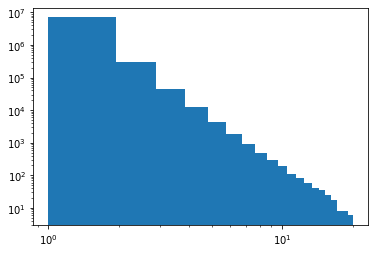

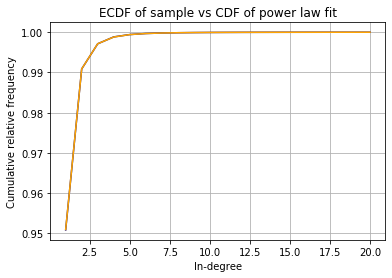

Test statistic of KS test: D =  0.00010832973067476104
Critical value for significance value alpha=0.05 and n=7336216: 0.0005021146045489595
Critical value for significance value alpha=0.01 and n=7336216: 0.0006017991216285323

The test statistic for our sample is smaller than the critical value for alpha=0.01. 
Therefore, we can not reject the 0-hypothesis.
Hence, our test suggests that it is hence plausible that our data could follow the fitted distibution :)


In [279]:
# test: generate a random sample from theoretical distribution:

print(pdf_fit)
print(degrees)
random_sample = np.random.choice(degrees, size=7336216, p=pdf_fit)
hist = plt.hist(random_sample, bins=20)
plt.xscale('log')
plt.yscale('log')
print(hist)


pdf_sample = hist[0]/sum(hist[0])
ecdf_sample = np.cumsum(pdf_sample)
plt.figure()
plt.plot(degrees, ecdf_sample, color='darkblue', label='ECDF')
plt.plot(degrees, cdf_fit, color='orange', label='CDF fit')
plt.xlabel('In-degree')
plt.ylabel('Cumulative relative frequency')
plt.title("ECDF of sample vs CDF of power law fit")
plt.grid()
plt.show()

# calculate absolute differences of the cdf and the ecdf of sample:
array_absolute_differences_ecdfsample_cdf = np.abs(ecdf_sample-cdf_fit)

# get the maximal absolute difference
# (this is the test statistic for the KS test)
ks_test_statistic_sample = max(array_absolute_differences_ecdfsample_cdf)
print("Test statistic of KS test: D = ", ks_test_statistic_sample)


sample_size = sum(freq_of_degrees)


ks_critical_value005 = 1.36/np.sqrt(sum(freq_of_degrees)) # alpha = 0.05
ks_critical_value001= 1.63/np.sqrt(sum(freq_of_degrees)) # alpha = 0.01

print("Critical value for significance value alpha=0.05 and n={}: {}".format(sample_size, ks_critical_value005))
print("Critical value for significance value alpha=0.01 and n={}: {}".format(sample_size, ks_critical_value001))
print()

if ks_test_statistic_sample < ks_critical_value001:
    print("The test statistic for our sample is smaller than the critical value for alpha=0.01. \nTherefore, we can not reject the 0-hypothesis.")
    print("Hence, our test suggests that it is plausible that our data could follow the fitted distibution :)")
else: 
    print("The test statistic for our sample is greater than the critical value for alpha=0.01. \nTherefore, we should reject the 0-hypothesis.")
    print("Hence, our test suggests that it is likely that our sample does not follow the fitted theoretical distribution :(")
    